## Experiments: Comparing RSAST with other methods

In [32]:
import sys 
import os 
#add sast library path
file_path = os.path.dirname(os.getcwd())+"/sast"

#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.path.dirname(os.getcwd())+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\sast"


#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

#add cd_diagram library path
file_path = os.path.dirname(os.getcwd())+"\cd_diagram"

#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)


file_path = os.path.dirname(os.getcwd())+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"\cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

file_path = os.getcwd()+"/cd_diagram"
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)

sys.path


['c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST',
 'c:\\ProgramData\\Anaconda3\\python39.zip',
 'c:\\ProgramData\\Anaconda3\\DLLs',
 'c:\\ProgramData\\Anaconda3\\lib',
 'c:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Nicolas R\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'c:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Nicolas R\\.ipython',
 'c:\\Users\\Nicolas R\\random_sast/sast',
 'c:\\Users\\Nicolas R\\random_sast\\sast',
 'c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST/sast',
 'c:\\Users\\Nicolas R\\random_sast\\ExperimentationRSAST\\sast',
 'c:\\Users\\Nicolas R\\random_sast\\cd_diagram',
 'c:\\Users\\Nicolas R\\random_sast/cd_diagram',
 'c:\\Users\\Nicolas R\\random_sast\\Experimentation

In [33]:
from sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os
import seaborn as sns
import math
hyperparameter='ACF&PACF: n_random_points=10 nb_inst_per_class=30'

### Reading Datasets

In [34]:

# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)

        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]+"_AVRBC"
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]



In [35]:
# Set directory where the csv files are located

#filepath = os.getcwd()+'/singleTrainTest.csv'
filepath = os.getcwd()+'/Resamples.csv'
df = pd.read_csv(filepath)
df = df.melt(id_vars=["Unnamed: 0"], 
        var_name="method", 
        value_name="score")
df = df.rename(columns={'Unnamed: 0':'dataset'})
df['method'] = df['method']+"_RES"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])
df_other_methods

,dataset,score,method
0,ACSF1,0.870000,BOSS_AVRBC
1,Adiac,0.757033,BOSS_AVRBC
2,ArrowHead,0.828571,BOSS_AVRBC
3,Beef,0.833333,BOSS_AVRBC
4,BeetleFly,0.900000,BOSS_AVRBC
...,...,...,...
3225,Wine,0.912037,HIVE-COTE_RES
3226,WordSynonyms,0.747962,HIVE-COTE_RES
3227,Worms,0.734026,HIVE-COTE_RES
3228,WormsTwoClass,0.783896,HIVE-COTE_RES


In [36]:

# Set directory where the csv files are located
df_other_methods=df_other_methods[df_other_methods.method!="STC"]
filepath = os.getcwd()+'/SAST_TESTFOLDS.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','STC':'score'})
df['method']="STC_MB"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])



In [37]:
# Set directory where the csv files are located

filepath = os.getcwd()+'/SAST_TESTFOLDS.csv'
df = pd.read_csv(filepath)
df = df.rename(columns={'folds:':'dataset','0':'score'})
df['method']="SAST"
df=df[['dataset','score','method']]
df_other_methods=pd.concat([df_other_methods,df])

In [38]:
df_other_methods['method'].unique()

array(['BOSS_AVRBC', 'Catch22_AVRBC', 'cBOSS_AVRBC', 'ELIS++_AVRBC',
       'FS_AVRBC', 'HIVE-COTEv1_AVRBC', 'InceptionTime_AVRBC', 'LS_AVRBC',
       'ProximityForest_AVRBC', 'ResNet_AVRBC', 'RISE_AVRBC',
       'ROCKET_AVRBC', 'S-BOSS_AVRBC', 'STC_AVRBC', 'TS-CHIEF_AVRBC',
       'TSF_AVRBC', 'WEASEL_AVRBC', 'NB_RES', 'C45_RES', 'SVML_RES',
       'SVMQ_RES', 'Logistic_RES', 'BN_RES', 'RandF_RES', 'RotF_RES',
       'MLP_RES', 'Euclidean_1NN_RES', 'DTW_R1_1NN_RES', 'DTW_Rn_1NN_RES',
       'DDTW_R1_1NN_RES', 'DDTW_Rn_1NN_RES', 'ERP_1NN_RES',
       'LCSS_1NN_RES', 'MSM_1NN_RES', 'TWE_1NN_RES', 'WDDTW_1NN_RES',
       'WDTW_1NN_RES', 'DD_DTW_RES', 'DTD_C_RES', 'DTW_F_RES', 'ST_RES',
       'LS_RES', 'FS_RES', 'BoP_RES', 'SAXVSM_RES', 'BOSS_RES', 'TSF_RES',
       'TSBF_RES', 'LPS_RES', 'ACF_RES', 'PS_RES', 'EE_RES',
       'CID_DTW_RES', 'Flat-COTE_RES', 'HIVE-COTE_RES', 'STC_MB', 'SAST'],
      dtype=object)

In [39]:
df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC_MB','ROCKET_AVRBC','HIVE-COTEv1_AVRBC'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST','STC'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['SAST'])]
#df_other_methods=df_other_methods[df_other_methods['method'].isin(['ELIS++','LS','FS','SAST'])]
df_other_methods['method'].unique()

array(['HIVE-COTEv1_AVRBC', 'ROCKET_AVRBC', 'STC_MB', 'SAST'],
      dtype=object)

In [40]:
# Set directory where the csv files are located
#directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

directories=[]
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_All')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_1')
directories.append(os.getcwd()+'/ResultsRsast/Server17_Comparison_RSAST_Extra_2')
#directories.append(os.getcwd()+'/ResultsRsast/Server16_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/ResultsRsast/Server17_Hyperparameter_Tunning')
#directories.append(os.getcwd()+'/results_accuracy_per_ds')
#directories.append(os.getcwd()+'/results_accuracy_per_ds_10000')

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for directory in directories:
    for filename in os.listdir(directory):
        # Check if the file starts with "df_overall_tunning" and ends with ".csv"
        if filename.startswith("df_all_overall_tunning") and filename.endswith(".csv"):
            # Read the csv file into a dataframe
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            df['rpoint']=df['rpoint'].astype(str)
            df['nb_per_class']=df['nb_per_class'].astype(str)
            df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
            df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
            df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
            df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
# df_result.head(3)

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.repl

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\2621841886.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.repl

In [41]:
df_result=df_result[['accuracy','dataset_name','classifier_name','time']]

df_result=df_result[df_result["classifier_name"]==hyperparameter]

df_result.dataset_name.unique()


array(['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME',
       'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'Coffee',
       'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction',
       'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect',
       'DistalPhalanxTW', 'DodgerLoopDay', 'DodgerLoopGame',
       'DodgerLoopWeekend', 'Earthquakes', 'ECG200', 'ECG5000',
       'ECGFiveDays', 'ElectricDevices', 'FaceAll', 'FaceFour',
       'FacesUCR', 'FiftyWords', 'FreezerRegularTrain',
       'FreezerSmallTrain', 'Fungi', 'GunPoint', 'GunPointAgeSpan',
       'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham',
       'Herring', 'InsectWingbeatSound', 'ItalyPowerDemand', 'Meat',
       'MedicalImages', 'MiddlePhalanxOutlineAgeGroup',
       'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxTW', 'MoteStrain',
       'PhalangesOutlinesCorrect', 'Plane', 'PowerCons',
       'ProximalPhalanxOutlineAgeGroup', 'ProximalPhalanxOutlineCorrect',
       

In [42]:
len(df_result.dataset_name.unique())

71

In [43]:
df_other_methods

,dataset,score,method
406,ACSF1,0.920000,HIVE-COTEv1_AVRBC
407,Adiac,0.808184,HIVE-COTEv1_AVRBC
408,ArrowHead,0.834286,HIVE-COTEv1_AVRBC
409,Beef,0.866667,HIVE-COTEv1_AVRBC
410,BeetleFly,0.950000,HIVE-COTEv1_AVRBC
...,...,...,...
67,TwoPatterns,0.990000,SAST
68,UMD,0.980000,SAST
69,Wafer,1.000000,SAST
70,Wine,0.850000,SAST


In [44]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]

df_other_methods

,dataset_name,accuracy,classifier_name
407,Adiac,0.808184,HIVE-COTEv1_AVRBC
408,ArrowHead,0.834286,HIVE-COTEv1_AVRBC
409,Beef,0.866667,HIVE-COTEv1_AVRBC
410,BeetleFly,0.950000,HIVE-COTEv1_AVRBC
411,BirdChicken,1.000000,HIVE-COTEv1_AVRBC
...,...,...,...
67,TwoPatterns,0.990000,SAST
68,UMD,0.980000,SAST
69,Wafer,1.000000,SAST
70,Wine,0.850000,SAST


In [45]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [46]:

concatenated_df['classifier_name'].replace(hyperparameter,"RSAST",inplace=True)
hyperparameter="RSAST"

In [47]:
concatenated_df['classifier_name'].unique()

array(['HIVE-COTEv1_AVRBC', 'ROCKET_AVRBC', 'STC_MB', 'SAST', 'RSAST'],
      dtype=object)

In [48]:
len(concatenated_df.dataset_name.unique())

71

### Overall analysis

#### Accuracy: RSAST vs Other methods

C:\Users\Nicolas R\AppData\Local\Temp\ipykernel_7280\853197985.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


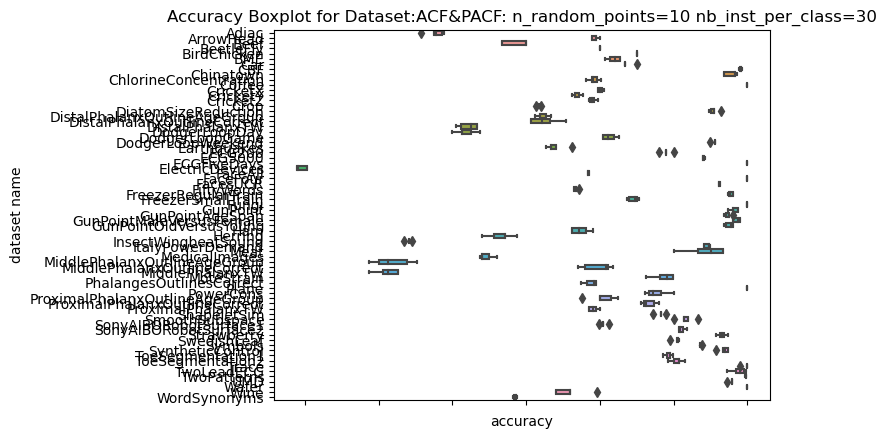

In [49]:
max_bx=max(df_result.accuracy)
min_bx=min(df_result.accuracy)


#df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name','classifier_name'], columns=['rpoint'],values='accuracy')
#df_to_cd = df_to_cd.reindex(columns=["1","10","30","50","100","half_len"])

#print(df_to_cd.head(5))

# Plot
fig, ax = plt.subplots()


#order=list(df_to_cd)
sns.boxplot(data=df_result, y='dataset_name', x='accuracy')
#plt.boxplot(df_to_cd, labels=list(df_to_cd), showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Axis details

ax.set(ylabel='dataset name', xlabel='accuracy', title='Accuracy Boxplot for Dataset:'+str(df_result["classifier_name"].unique()[0]))

#plt.xticks([1, 2, 3, 4, 5, 6],list(df_to_cd) )
#print(df_to_cd.describe())
#plt.tight_layout()
# save plot
plt.savefig('images_boxplot_acc/boxplot_acc_per_ds.png')

In [50]:
filter_param=concatenated_df[concatenated_df.classifier_name==hyperparameter]

In [51]:
stats = filter_param.groupby(['dataset_name'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []
ci95_hi_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95_hi_lo.append(1.96*s/math.sqrt(c))

#stats['ci95_hi'] = ci95_hi
#stats['ci95_lo'] = ci95_lo
stats['ci95_interval'] = ci95_hi_lo
print(stats.round(2))

              mean  count   std  ci95_interval
dataset_name                                  
Adiac         0.58      5  0.01           0.01
ArrowHead     0.79      5  0.00           0.00
BME           0.82      5  0.01           0.01
Beef          0.69      5  0.02           0.02
BeetleFly     0.80      5  0.00           0.00
...            ...    ...   ...            ...
TwoPatterns   1.00      5  0.00           0.00
UMD           0.98      5  0.00           0.00
Wafer         1.00      5  0.00           0.00
Wine          0.76      5  0.02           0.02
WordSynonyms  0.69      5  0.00           0.00

[71 rows x 4 columns]


In [52]:
# create a pivot table with the mean of score by hyperparameter
t_score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
#t_score_by_method=score_by_method.transpose()[[hyperparameter,"SAST"]].round(2)
#t_score_by_method=score_by_method.transpose().round(2)
t_score_by_method.iloc[0:25,:]


classifier_name,HIVE-COTEv1_AVRBC,ROCKET_AVRBC,RSAST,SAST,STC_MB
dataset_name,,,,,
Adiac,0.808184,0.785166,0.576982,0.68,0.48
ArrowHead,0.834286,0.788571,0.793143,0.77,0.75
BME,0.953333,1.000000,0.818667,0.87,0.87
Beef,0.866667,0.833333,0.686667,0.80,0.71
BeetleFly,0.950000,0.900000,0.800000,0.80,0.78
BirdChicken,1.000000,0.900000,0.850000,0.76,0.86
CBF,0.998889,1.000000,0.990667,0.98,0.95
Car,0.833333,0.883333,0.836667,0.88,0.77
Chinatown,0.979592,0.982507,0.977259,0.96,0.97


In [53]:
t_score_by_method.iloc[25:49,:]

classifier_name,HIVE-COTEv1_AVRBC,ROCKET_AVRBC,RSAST,SAST,STC_MB
dataset_name,,,,,
Earthquakes,0.748201,0.748201,0.739568,0.68,0.75
ElectricDevices,0.752043,0.725976,0.395305,0.62,0.32
FaceAll,0.781065,0.939645,0.784024,0.78,0.74
FaceFour,0.988636,0.977273,1.000000,1.00,0.99
FacesUCR,0.960000,0.962439,0.962146,0.95,0.94
FiftyWords,0.773626,0.835165,0.767033,0.77,0.59
FreezerRegularTrain,0.997193,0.997544,0.976982,0.98,0.97
FreezerSmallTrain,0.984211,0.945965,0.845333,0.73,0.93
Fungi,NaN,NaN,1.000000,0.90,0.00


In [54]:
t_score_by_method.iloc[49:75,:]

classifier_name,HIVE-COTEv1_AVRBC,ROCKET_AVRBC,RSAST,SAST,STC_MB
dataset_name,,,,,
Plane,1.000000,1.000000,1.000000,1.00,1.00
PowerCons,1.000000,0.944444,0.876667,0.91,0.94
ProximalPhalanxOutlineAgeGroup,0.848780,0.853659,0.802927,0.85,0.86
ProximalPhalanxOutlineCorrect,0.893471,0.900344,0.865979,0.87,0.82
ProximalPhalanxTW,0.814634,0.804878,0.791220,0.78,0.77
ShapeletSim,1.000000,1.000000,0.882222,0.96,1.00
SmoothSubspace,0.980000,0.980000,0.916000,0.91,0.95
SonyAIBORobotSurface1,0.753744,0.921797,0.804326,0.76,0.79
SonyAIBORobotSurface2,0.935992,0.916055,0.910598,0.85,0.88


In [55]:
t_score_by_method.describe().round(2)

classifier_name,HIVE-COTEv1_AVRBC,ROCKET_AVRBC,RSAST,SAST,STC_MB
count,67.00,67.00,71.00,71.00,71.00
mean,0.88,0.89,0.84,0.84,0.79
std,0.12,0.11,0.14,0.13,0.20
min,0.58,0.56,0.40,0.53,0.00
25%,0.78,0.81,0.77,0.76,0.68
50%,0.94,0.92,0.87,0.87,0.84
75%,0.99,0.99,0.97,0.96,0.95
max,1.00,1.00,1.00,1.00,1.00


In [56]:
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
t_score_by_method=score_by_method.transpose()[[hyperparameter,"SAST"]].round(2)
total_wins=len(t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("winning RSAST: "+str(total_wins))

winning RSAST: 30


In [57]:
total_loss=len(t_score_by_method[0>(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("losse RSAST: "+str(total_loss))

losse RSAST: 26


In [58]:
total_draws=len(t_score_by_method[0==(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))])
print("draws: "+str(total_draws))

draws: 15


In [59]:
#wins of RSAST
t_score_by_method[0<(t_score_by_method[hyperparameter].round(2)-t_score_by_method["SAST"].round(2))].index

Index(['ArrowHead', 'BirdChicken', 'CBF', 'Chinatown', 'ChlorineConcentration',
       'CricketX', 'CricketY', 'CricketZ', 'DodgerLoopDay', 'ECG200',
       'Earthquakes', 'FacesUCR', 'FreezerSmallTrain', 'Fungi', 'GunPoint',
       'GunPointOldVersusYoung', 'Ham', 'Herring', 'Meat', 'MoteStrain',
       'PhalangesOutlinesCorrect', 'ProximalPhalanxTW', 'SmoothSubspace',
       'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'SwedishLeaf',
       'ToeSegmentation1', 'ToeSegmentation2', 'TwoLeadECG', 'TwoPatterns'],
      dtype='object', name='dataset_name')

In [60]:
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'], aggfunc='var').round(4)

,accuracy
classifier_name,
HIVE-COTEv1_AVRBC,0.0142
ROCKET_AVRBC,0.0129
RSAST,0.0199
SAST,0.0166
STC_MB,0.0415


In [61]:
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')
score_by_method

classifier_name,HIVE-COTEv1_AVRBC,ROCKET_AVRBC,RSAST,SAST,STC_MB
dataset_name,,,,,
Adiac,0.808184,0.785166,0.576982,0.68,0.48
ArrowHead,0.834286,0.788571,0.793143,0.77,0.75
BME,0.953333,1.000000,0.818667,0.87,0.87
Beef,0.866667,0.833333,0.686667,0.80,0.71
BeetleFly,0.950000,0.900000,0.800000,0.80,0.78
...,...,...,...,...,...
TwoPatterns,0.999500,1.000000,0.997950,0.99,0.81
UMD,0.979167,0.993056,0.977778,0.98,0.98
Wafer,0.999513,0.998378,1.000000,1.00,1.00


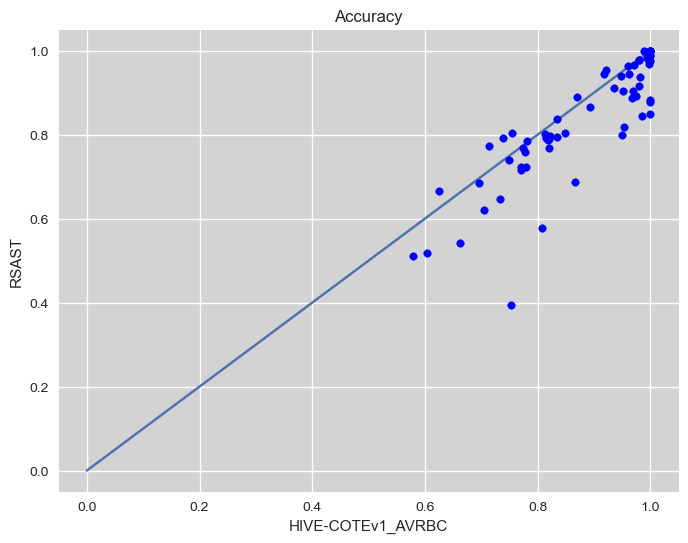

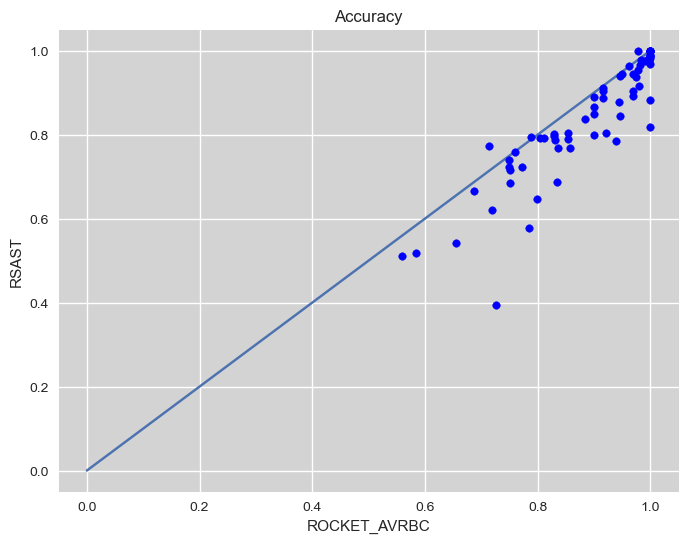

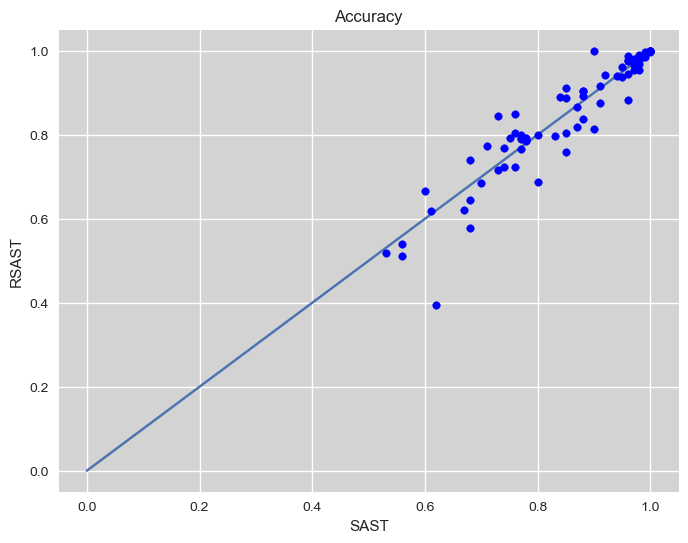

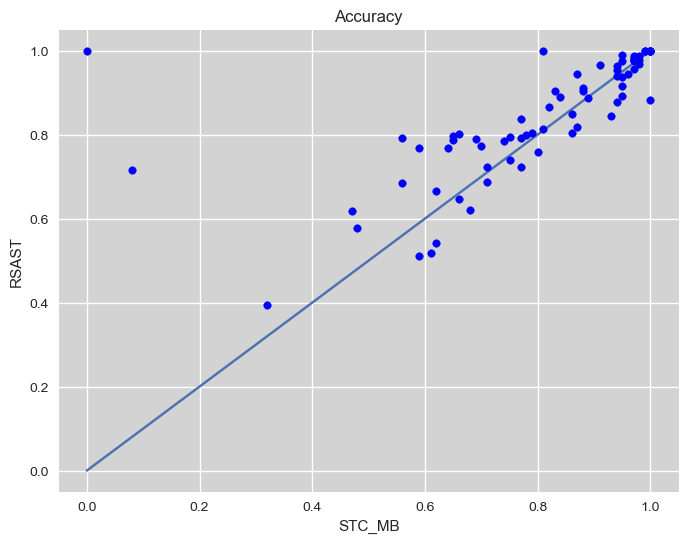

In [62]:
for method in score_by_method.columns.drop(hyperparameter):
    y=score_by_method[hyperparameter]
    x=score_by_method[method]

    # set the style of the plot
    plt.style.use('seaborn')

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # plot the line
    ax.plot([0,1], [0,1])

    # plot the points
    ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

    # add labels and title
    ax.set_ylabel('RSAST')
    ax.set_xlabel(method)
    ax.set_title('Accuracy')


    # set the background color
    ax.set_facecolor('lightgrey')
    plt.savefig('images_one_vs_one_comparison/RSASTvs'+method+'.png')


In [63]:
# create a pivot table with the mean of time by hyperparameter
time_per_method=pd.pivot_table(df_result, values='time', columns=['classifier_name'],index=['dataset_name'], aggfunc='mean')/60
time_per_method

classifier_name,ACF&PACF: n_random_points=10 nb_inst_per_class=30
dataset_name,
Adiac,0.467937
ArrowHead,0.106862
BME,0.019584
Beef,0.463537
BeetleFly,0.391651
...,...
TwoPatterns,0.127397
UMD,0.027370
Wafer,0.069980


#### Generate CD Diagram comparison

In [65]:
pv_all=pd.pivot_table(concatenated_df,index='dataset_name',values='accuracy',aggfunc="count")
ds_complete=pv_all[pv_all.accuracy==max(pv_all.accuracy)].reset_index().dataset_name.unique()
ds_complete
concatenated_df=concatenated_df[concatenated_df.dataset_name.isin(ds_complete)]

In [66]:
concatenated_df=concatenated_df[concatenated_df.dataset_name!="Fungi"]
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
pd.pivot_table(df_perf, values='accuracy', index=['classifier_name'], aggfunc='count')

,accuracy
classifier_name,
HIVE-COTEv1_AVRBC,67
ROCKET_AVRBC,67
RSAST,67
SAST,67
STC_MB,67


In [67]:
concatenated_df.classifier_name.unique()

array(['HIVE-COTEv1_AVRBC', 'ROCKET_AVRBC', 'STC_MB', 'SAST', 'RSAST'],
      dtype=object)

In [68]:

from cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, fname='images_cd_diagram/cd-diagram_overall_comparison_other_method.png')


{0: 'STC_MB', 1: 'SAST', 2: 'RSAST', 3: 'HIVE-COTEv1_AVRBC', 4: 'ROCKET_AVRBC'}
[0, 1, 2]
[3, 4]


In [69]:
df_perf["classifier_name"].unique()

array(['HIVE-COTEv1_AVRBC', 'ROCKET_AVRBC', 'RSAST', 'SAST', 'STC_MB'],
      dtype=object)

In [70]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

,0
STC_MB,3.910448
SAST,3.567164
RSAST,3.559701
HIVE-COTEv1_AVRBC,2.156716
ROCKET_AVRBC,1.805970
